**Import Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df = pd.read_csv(r'C:\Users\LEGION\OneDrive\Documents\Naresh IT\Datafiles\Visadataset.csv')
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


In [3]:
visa_df.select_dtypes(exclude='object').columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**prevailing_wage**

**Operations**

- len
- max
- min
- mean
- median
- std
- 75%
- 50%
- 25%

**count or len**

In [4]:
len(visa_df['prevailing_wage'])

25480

**max**

In [5]:
max(visa_df['prevailing_wage'])

319210.27

In [6]:
visa_df['prevailing_wage'].max() # Using Pandas

319210.27

In [7]:
np.max(visa_df['prevailing_wage']) #numpy

319210.27

**min**

In [8]:
min(visa_df['prevailing_wage'])

2.1367

In [9]:
visa_df['prevailing_wage'].min()

2.1367

In [10]:
np.min(visa_df['prevailing_wage'])

2.1367

**mean**

In [11]:
visa_df['prevailing_wage'].mean()

74455.81459209183

In [12]:
np.mean(visa_df['prevailing_wage'])

74455.81459209183

**median**

In [13]:
visa_df['prevailing_wage'].median()

70308.20999999999

In [14]:
np.median(visa_df['prevailing_wage'])

70308.20999999999

**standard deviation (std)**

In [15]:
visa_df['prevailing_wage'].std()

52815.94232687357

In [16]:
np.std(visa_df['prevailing_wage'])

52814.90589711402

**Mode is not good option because it is a numerical value**

In [17]:
#All Together
wage_count = round(len(visa_df['prevailing_wage']), 2)
wage_min = round(visa_df['prevailing_wage'].min(), 2)
wage_max = round(visa_df['prevailing_wage'].max(), 2) 
wage_mean = round(visa_df['prevailing_wage'].mean(), 2)
wage_median = round(visa_df['prevailing_wage'].median(), 2)
wage_std = round(visa_df['prevailing_wage'].std(), 2)

wage_values = [wage_count, wage_min, wage_max, wage_mean, wage_median, wage_std]
indexes = ["Wage Count", "Wage Min", "Wage Max", "Wage Mean", "Wage Median", "Wage STD"]
dict1 = {"prevailing_wage": wage_values}
wage_df = pd.DataFrame(dict1, index=indexes)
wage_df

,prevailing_wage
Wage Count,25480.00
Wage Min,2.14
Wage Max,319210.27
Wage Mean,74455.81
Wage Median,70308.21
Wage STD,52815.94


In [18]:
wage_df.loc[['Wage Count'], ["Prevailing Wage"]]

KeyError: "None of [Index(['Prevailing Wage'], dtype='object')] are in the [columns]"

**Percentile and Quartile**

- **Percentile**
       - np.percentile()
       - It will take two arguments
               - Data : a
               - percentile : q the values varies from 0 to 100
               - if you want 50P data q = 50
               
- **Quantile**
    - np.quantile()
    - It will take two arguments
                - Data : a
                - percentile : q the values varies from 0 to 1
                - if you want 50P data q = 0.5

**25P-50P-75P**

**Percentile**

In [34]:
wage_25p = round(np.percentile(visa_df['prevailing_wage'], 25), 2) 
wage_50p = round(np.percentile(visa_df['prevailing_wage'], 50), 2)
wage_75p = round(np.percentile(visa_df['prevailing_wage'], 75), 2)

print(f"the 25% data is {wage_25p}")
print(f"the 50% data is {wage_50p}")
print(f"the 75% data is {wage_75p}")

the 25% data is 34015.48
the 50% data is 70308.21
the 75% data is 107735.51


**25P-50P-75P**

**Quantile**

In [35]:
wage_25p = round(np.quantile(visa_df['prevailing_wage'], 0.25), 2) 
wage_50p = round(np.quantile(visa_df['prevailing_wage'], 0.50), 2)
wage_75p = round(np.quantile(visa_df['prevailing_wage'], 0.75), 2)

print(f"the 25% data is {wage_25p}")
print(f"the 50% data is {wage_50p}")
print(f"the 75% data is {wage_75p}")

the 25% data is 34015.48
the 50% data is 70308.21
the 75% data is 107735.51


**Understand the percentile meaning**

- definition of 25 percentile
    - there are 25% of employees has salary less than 34015.48
    - total employees = 25480
    - 25 % of employees = 25*24580/100 = 6370
    - 6370 employees salary less than 34015.48

**25p** 

In [36]:
con = visa_df['prevailing_wage'] < wage_25p
len(visa_df[con])

6370

**50P**

In [37]:
con = visa_df['prevailing_wage'] < wage_50p
len(visa_df[con])

12740

**75p**

In [38]:
con = visa_df['prevailing_wage'] < wage_75p
len(visa_df[con])

19110

**Emperical Rule (68-95-99.7)**
<img src="https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_empirical-rule.jpg" jsaction="VQAsE" class="sFlh5c pT0Scc iPVvYb" style="max-width: 810px; width: 557px; height: 279px; margin: 0px;" alt="Empirical Rule (68-95-99.7) Explained | Built In" jsname="kn3ccd" aria-hidden="false">

- First calculate mean value
- Second calculate std value
- con1 : mean - 1 * std
- con2 : mean + 1 * std
- If you apply above conditionon wage data, the output count should be equal to 68 percentiledata
- 68% of total employees: 17326

In [39]:
v1 = wage_mean - 1 * wage_std
v2 = wage_mean + 1 * wage_std
print(f"68% of data lies between {v1} to {v2}")
con1 = visa_df['prevailing_wage'] > v1
con2 = visa_df['prevailing_wage'] < v2

count1 = len(visa_df[con1 & con2])
print(f"Total number of employees earning between {v1} to {v2} = {count1}")
print(f"68% of 25480 = {68*25480/100}")
print(f"{count1} is nearly equal to {68*25480/100} as dataset doesn't follow normal distribution")

68% of data lies between 21639.869999999995 to 127271.75
Total number of employees earning between 21639.869999999995 to 127271.75 = 17171
68% of 25480 = 17326.4
17171 is nearly equal to 17326.4 as dataset doesn't follow normal distribution


In [40]:
v1 = wage_mean - 2 * wage_std
v2 = wage_mean + 2 * wage_std
print(f"95% of data lies between {v1} to {v2}")
con1 = visa_df['prevailing_wage'] > v1
con2 = visa_df['prevailing_wage'] < v2

count1 = len(visa_df[con1 & con2])
print(f"Total number of employees earning between {v1} to {v2} = {count1}")
print(f"95% of 25480 = {95*25480/100}")
print(f"{count1} is nearly equal to {95*25480/100} as dataset doesn't follow normal distribution")

95% of data lies between -31176.070000000007 to 180087.69
Total number of employees earning between -31176.070000000007 to 180087.69 = 24582
95% of 25480 = 24206.0
24582 is nearly equal to 24206.0 as dataset doesn't follow normal distribution


In [41]:
v1 = wage_mean - 3 * wage_std
v2 = wage_mean + 3 * wage_std
print(f"99.7% of data lies between {v1} to {v2}")
con1 = visa_df['prevailing_wage'] > v1
con2 = visa_df['prevailing_wage'] < v2

count1 = len(visa_df[con1 & con2])
print(f"Total number of employees earning between {v1} to {v2} = {count1}")
print(f"99.7% of 25480 = {99.7*25480/100}")
print(f"{count1} is nearly equal to {99.7*25480/100} as dataset doesn't follow normal distribution")

99.7% of data lies between -83992.01000000001 to 232903.63
Total number of employees earning between -83992.01000000001 to 232903.63 = 25186
99.7% of 25480 = 25403.56
25186 is nearly equal to 25403.56 as dataset doesn't follow normal distribution


In [42]:
#All Together
wage_count = round(len(visa_df['prevailing_wage']), 2)
wage_min = round(visa_df['prevailing_wage'].min(), 2)
wage_max = round(visa_df['prevailing_wage'].max(), 2) 
wage_mean = round(visa_df['prevailing_wage'].mean(), 2)
wage_median = round(visa_df['prevailing_wage'].median(), 2)
wage_std = round(visa_df['prevailing_wage'].std(), 2)
wage_25p = round(np.quantile(visa_df['prevailing_wage'], 0.25), 2) 
wage_50p = round(np.quantile(visa_df['prevailing_wage'], 0.50), 2)
wage_75p = round(np.quantile(visa_df['prevailing_wage'], 0.75), 2)

wage_values = [wage_count, wage_min, wage_max, wage_mean, wage_median, wage_std, wage_25p, wage_50p, wage_75p]
indexes = ["Wage Count", "Wage Min", "Wage Max", "Wage Mean", "Wage Median", "Wage STD", "Wage 25%", "Wage 50%",
          "Wage 75%"]
dict1 = {"prevailing_wage": wage_values}
wage_df = pd.DataFrame(dict1, index=indexes)
wage_df

,prevailing_wage
Wage Count,25480.00
Wage Min,2.14
Wage Max,319210.27
Wage Mean,74455.81
Wage Median,70308.21
Wage STD,52815.94
Wage 25%,34015.48
Wage 50%,70308.21
Wage 75%,107735.51


In [28]:
cols = ["Count", "Min", "Max", "Mean", "Median", "STD", "25%", "50%",
          "75%"]
l1 = []
index = []
for i in visa_df.select_dtypes(exclude='object').columns:
    count = round(len(visa_df[i]), 2)
    minVal = round(visa_df[i].min(), 2)
    maxVal = round(visa_df[i].max(), 2) 
    mean = round(visa_df[i].mean(), 2)
    median = round(visa_df[i].median(), 2)
    std = round(visa_df[i].std(), 2)
    percentile_25 = round(np.quantile(visa_df[i], 0.25), 2) 
    percentile_50 = round(np.quantile(visa_df[i], 0.50), 2)
    percentile_75 = round(np.quantile(visa_df[i], 0.75), 2)

    l1.append([count, minVal, maxVal, mean, median, std, percentile_25, percentile_50, percentile_75])
    index.append(i)
    
wage_df = pd.DataFrame(l1, index=index, columns=cols)
wage_df

,Count,Min,Max,Mean,Median,STD,25%,50%,75%
no_of_employees,25480,-26.00,602069.00,5667.04,2109.00,22877.93,1022.00,2109.00,3504.00
yr_of_estab,25480,1800.00,2016.00,1979.41,1997.00,42.37,1976.00,1997.00,2005.00
prevailing_wage,25480,2.14,319210.27,74455.81,70308.21,52815.94,34015.48,70308.21,107735.51


In [30]:
dict1 = {}
index = ["Count", "Min", "Max", "Mean", "Median", "STD", "25%", "50%",
          "75%"]
for i in visa_df.select_dtypes(exclude='object').columns:
    count = round(len(visa_df[i]), 2)
    minVal = round(visa_df[i].min(), 2)
    maxVal = round(visa_df[i].max(), 2) 
    mean = round(visa_df[i].mean(), 2)
    median = round(visa_df[i].median(), 2)
    std = round(visa_df[i].std(), 2)
    percentile_25 = round(np.quantile(visa_df[i], 0.25), 2) 
    percentile_50 = round(np.quantile(visa_df[i], 0.50), 2)
    percentile_75 = round(np.quantile(visa_df[i], 0.75), 2)
    dict1[i] = [count, minVal, maxVal, mean, median, std, percentile_25, percentile_50, percentile_75]
    
wage_df = pd.DataFrame(dict1, index=index)
wage_df

,no_of_employees,yr_of_estab,prevailing_wage
Count,25480.00,25480.00,25480.00
Min,-26.00,1800.00,2.14
Max,602069.00,2016.00,319210.27
Mean,5667.04,1979.41,74455.81
Median,2109.00,1997.00,70308.21
STD,22877.93,42.37,52815.94
25%,1022.00,1976.00,34015.48
50%,2109.00,1997.00,70308.21
75%,3504.00,2005.00,107735.51


**Describe**

- applicable on only numerical column

In [27]:
visa_df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


**Histogram**

- Histogram can be created uisng matplotlib
- Histogram can also be created using seaborn
- plt.hist()

(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([2.13670000e+00, 3.19229500e+04, 6.38437634e+04, 9.57645767e+04,
        1.27685390e+05, 1.59606203e+05, 1.91527017e+05, 2.23447830e+05,
        2.55368643e+05, 2.87289457e+05, 3.19210270e+05]),
 <BarContainer object of 10 artists>)

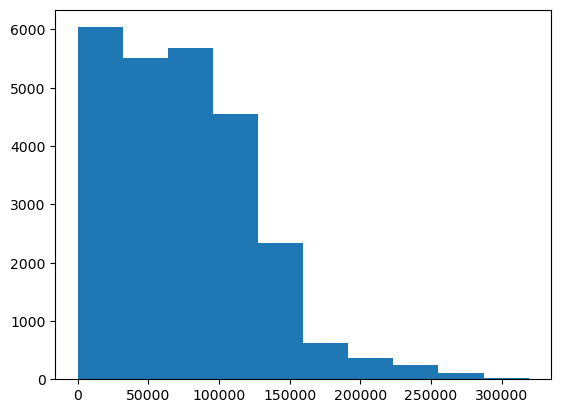

In [31]:
import matplotlib.pyplot as plt
plt.hist(visa_df['prevailing_wage'])

**from interval range**

- 2.13670000e+00, 3.19229500e+04
    - 6038 employees get salary

- 3.19229500e+04, 6.38437634e+04
    - 5504 employees get salary
    
Histogram will give 3 outputs
- frequuency
    - each interval range how many observations are there
- inverals
    - interval range
- number of intervals
    - interval count

**Checkpoint-1**

In [43]:
2.13670000e+00, 3.19229500e+04

(2.1367, 31922.95)

In [47]:
con1 = visa_df['prevailing_wage'] >= 2.13670000e+00
con2 = visa_df['prevailing_wage'] < 3.19229500e+04

count1 = len(visa_df[con1 & con2])
count1

6038

<BarContainer object of 10 artists>


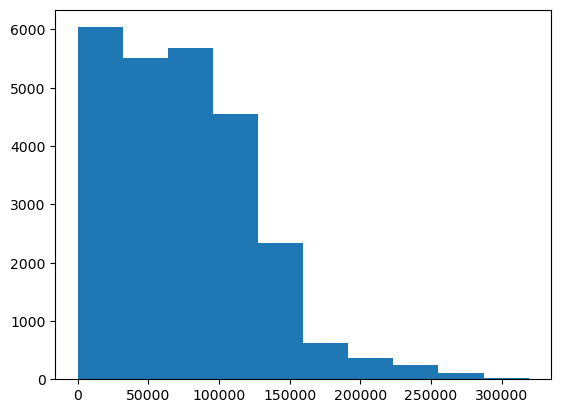

In [49]:
f,i,n = plt.hist(visa_df['prevailing_wage'])
print(n)

**bins**

- this argument is used to increase interval count in histgram plot

(array([2.475e+03, 3.380e+02, 3.330e+02, 3.750e+02, 3.420e+02, 3.830e+02,
        4.220e+02, 4.100e+02, 4.710e+02, 4.890e+02, 5.080e+02, 4.850e+02,
        5.140e+02, 5.950e+02, 5.740e+02, 5.580e+02, 5.570e+02, 5.510e+02,
        5.790e+02, 5.830e+02, 5.790e+02, 6.050e+02, 5.780e+02, 5.760e+02,
        5.510e+02, 6.080e+02, 5.510e+02, 5.660e+02, 5.380e+02, 5.290e+02,
        5.030e+02, 5.440e+02, 4.850e+02, 4.680e+02, 4.850e+02, 4.700e+02,
        4.410e+02, 3.750e+02, 4.070e+02, 3.730e+02, 3.750e+02, 2.980e+02,
        2.820e+02, 2.570e+02, 2.400e+02, 2.290e+02, 1.910e+02, 1.730e+02,
        1.540e+02, 1.350e+02, 9.900e+01, 1.120e+02, 8.000e+01, 5.900e+01,
        5.800e+01, 4.900e+01, 4.200e+01, 3.900e+01, 4.800e+01, 3.800e+01,
        3.900e+01, 4.000e+01, 4.500e+01, 4.200e+01, 4.000e+01, 3.800e+01,
        3.500e+01, 3.400e+01, 2.400e+01, 3.600e+01, 2.100e+01, 2.800e+01,
        3.400e+01, 2.300e+01, 2.300e+01, 2.900e+01, 1.600e+01, 2.900e+01,
        1.900e+01, 1.800e+01, 1.600e+0

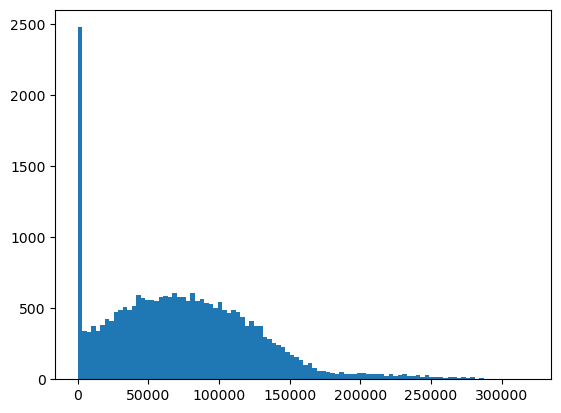

In [51]:
plt.hist(visa_df['prevailing_wage'], bins=100)

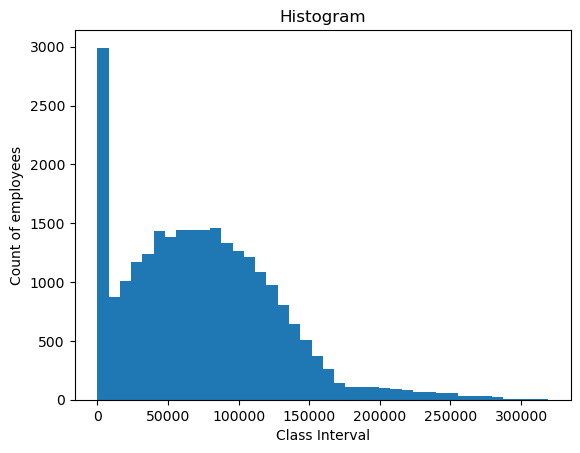

In [53]:
plt.hist(visa_df['prevailing_wage'], bins=40)
plt.title("Histogram")
plt.xlabel("Class Interval")
plt.ylabel("Count of employees")
plt.show()

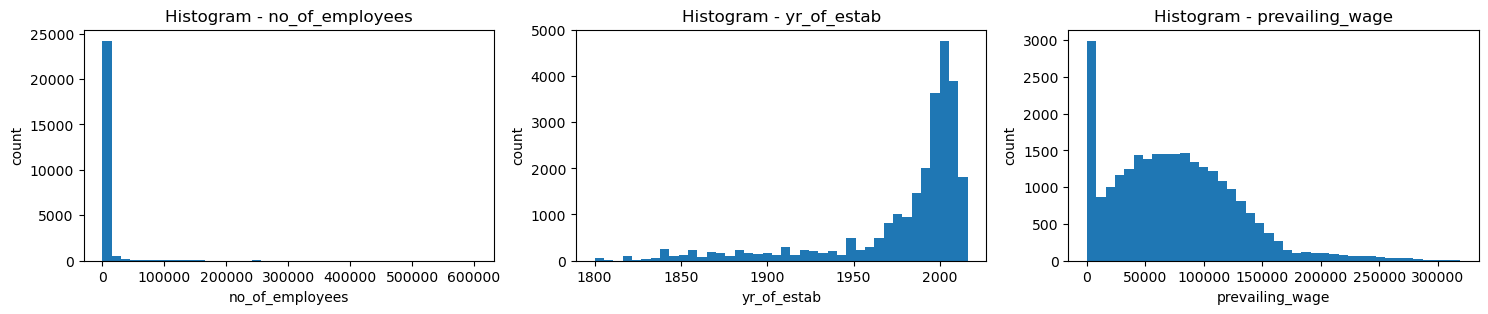

In [66]:
plotCount = 1
plt.figure(figsize=(18, 3))
for i in visa_df.select_dtypes(exclude="object").columns:
    plt.subplot(1, 3, plotCount)
    plt.hist(visa_df[i], bins=40)
    plt.title(f"Histogram - {i}")
    plt.xlabel(i)
    plt.ylabel("count")
    plotCount +=1
    

**Histogram using Seaborn**

- histplot
- distplot

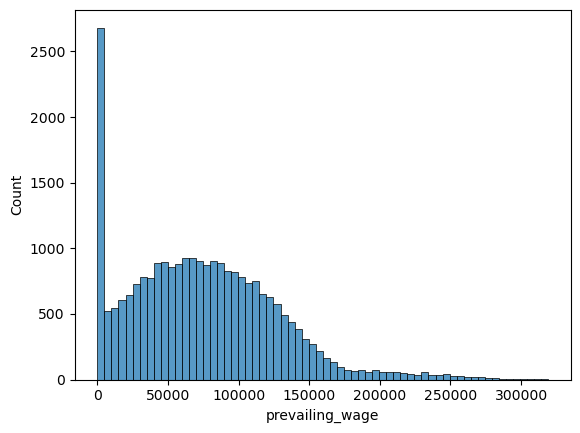

In [72]:
import seaborn as sns
sns.histplot(visa_df['prevailing_wage'])
plt.show()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_9436\3930160617.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(visa_df['prevailing_wage'])


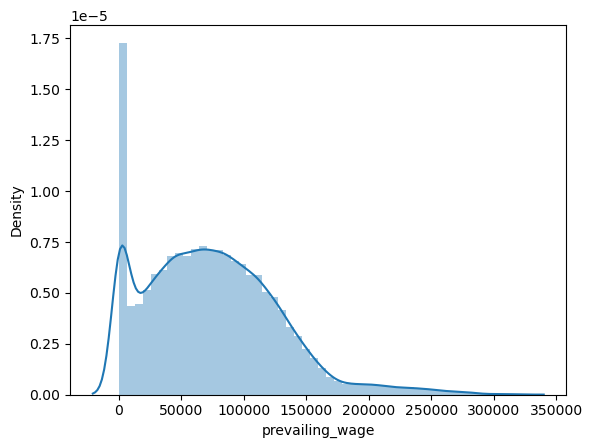

In [75]:
sns.distplot(visa_df['prevailing_wage'])
plt.show()

**Ignore Warnings**

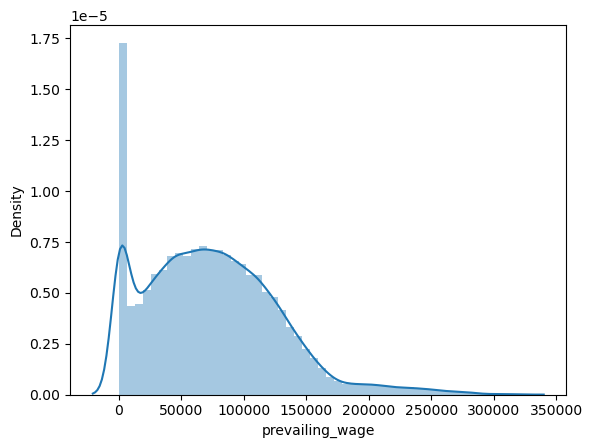

In [76]:
import warnings

warnings.filterwarnings('ignore')
sns.distplot(visa_df['prevailing_wage'])
plt.show()

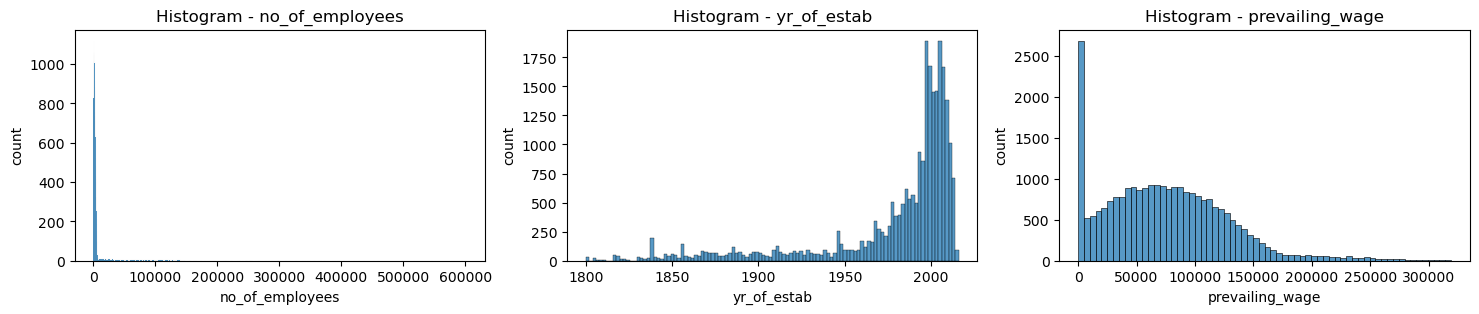

In [68]:
import seaborn as sns

plotCount = 1
plt.figure(figsize=(18, 3))
for i in visa_df.select_dtypes(exclude="object").columns:
    plt.subplot(1, 3, plotCount)
    sns.histplot(visa_df[i])
    plt.title(f"Histogram - {i}")
    plt.xlabel(i)
    plt.ylabel("count")
    plotCount +=1

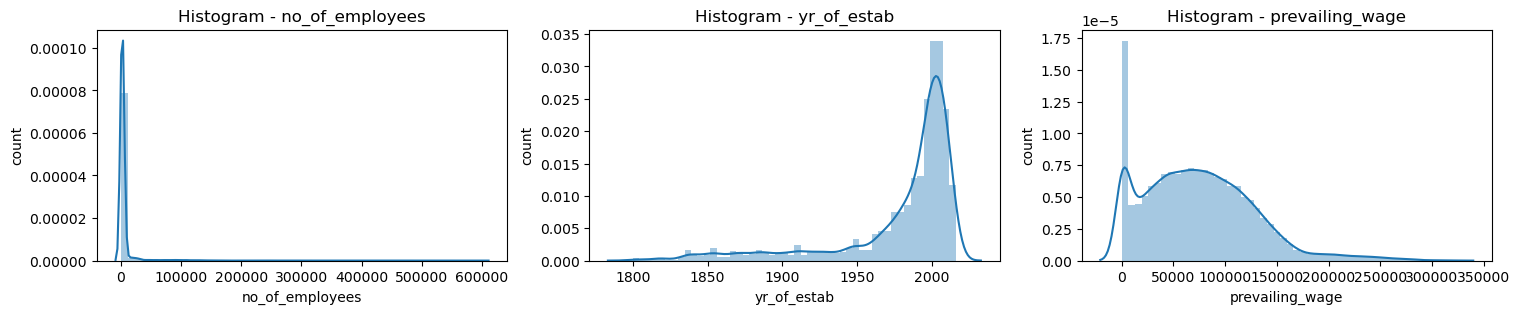

In [77]:
import seaborn as sns

plotCount = 1
plt.figure(figsize=(18, 3))
for i in visa_df.select_dtypes(exclude="object").columns:
    plt.subplot(1, 3, plotCount)
    sns.distplot(visa_df[i])
    plt.title(f"Histogram - {i}")
    plt.xlabel(i)
    plt.ylabel("count")
    plotCount +=1